<a href="https://colab.research.google.com/github/abdelmhe/FinalAssignmentAI/blob/main/RegressionHebatFinalAssignment_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <span style="color:orange">AI Final Regression Assignment </span>

In [34]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# 2.0 What is Regression?

Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable', or 'target') and one or more independent variables (often called 'features', 'predictors', or 'covariates'). The objective of regression in machine learning is to predict continuous values such as sales amount, quantity, temperature etc.

__[Learn More about Regression](https://hbr.org/2015/11/a-refresher-on-regression-analysis)__

# 3.0 Overview of the Regression Module in PyCaret
PyCaret's Regression module (`pycaret.regression`) is a supervised machine learning module which is used for predicting continuous values / outcomes using various techniques and algorithms. Regression can be used for predicting values / outcomes such as sales, units sold, temperature or any number which is continuous.

PyCaret's regression module has over 25 algorithms and 10 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's regression module has it all.

# 4.0 Dataset

Source:

The dataset was created by Athanasios Tsanas (tsanasthanasis '@' gmail.com) and Max Little (littlem '@' physics.ox.ac.uk) of the University of Oxford, in collaboration with 10 medical centers in the US and Intel Corporation who developed the telemonitoring device to record the speech signals. The original study used a range of linear and nonlinear regression methods to predict the clinician's Parkinson's disease symptom score on the UPDRS scale.


Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around 200 recordings per patient, the subject number of the patient is identified in the first column. For further information or to pass on comments, please contact Athanasios Tsanas (tsanasthanasis '@' gmail.com) or Max Little (littlem '@' physics.ox.ac.uk).

Further details are contained in the following reference -- if you use this dataset, please cite:
Athanasios Tsanas, Max A. Little, Patrick E. McSharry, Lorraine O. Ramig (2009),
'Accurate telemonitoring of Parkinson’s disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering (to appear).

Further details about the biomedical voice measures can be found in:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2009),
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease',
IEEE Transactions on Biomedical Engineering, 56(4):1015-1022


Attribute Information:

subject# - Integer that uniquely identifies each subject
age - Subject age
sex - Subject gender '0' - male, '1' - female
test_time - Time since recruitment into the trial. The integer part is the number of days since recruitment.
motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated
total_UPDRS - Clinician's total UPDRS score, linearly interpolated
Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency
Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
RPDE - A nonlinear dynamical complexity measure
DFA - Signal fractal scaling exponent
PPE - A nonlinear measure of fundamental frequency variation





The original dataset and description can be __[found here.](https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring)__ 

# 5.0 Getting the Data

In [36]:
#GETTING THE DATA AND READING IT
from pycaret.datasets import get_data
import numpy as np
import pandas as pd
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data')

In [ ]:
dataset #CHECKING THE DATASET

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0            1   72    0     5.6431       28.199       34.398    0.00662   
1            1   72    0    12.6660       28.447       34.894    0.00300   
2            1   72    0    19.6810       28.695       35.389    0.00481   
3            1   72    0    25.6470       28.905       35.810    0.00528   
4            1   72    0    33.6420       29.187       36.375    0.00335   
...        ...  ...  ...        ...          ...          ...        ...   
5870        42   61    0   142.7900       22.485       33.485    0.00406   
5871        42   61    0   149.8400       21.988       32.988    0.00297   
5872        42   61    0   156.8200       21.495       32.495    0.00349   
5873        42   61    0   163.7300       21.007       32.007    0.00281   
5874        42   61    0   170.7300       20.513       31.513    0.00282   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0        0.000034     0.00401      0.00317  ...        0.230       0.01438   
1        0.000017     0.00132      0.00150  ...        0.179       0.00994   
2        0.000025     0.00205      0.00208  ...        0.181       0.00734   
3        0.000027     0.00191      0.00264  ...        0.327       0.01106   
4        0.000020     0.00093      0.00130  ...        0.176       0.00679   
...           ...         ...          ...  ...          ...           ...   
5870     0.000031     0.00167      0.00168  ...        0.160       0.00973   
5871     0.000025     0.00119      0.00147  ...        0.215       0.01052   
5872     0.000025     0.00152      0.00187  ...        0.244       0.01371   
5873     0.000020     0.00128      0.00151  ...        0.131       0.00693   
5874     0.000021     0.00135      0.00166  ...        0.171       0.00946   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0          0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1          0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2          0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3          0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4          0.00929        0.01819      0.02036  0.011625  26.126  0.47188   
...            ...            ...          ...       ...     ...      ...   
5870       0.01133        0.01549      0.02920  0.025137  22.369  0.64215   
5871       0.01277        0.01904      0.03157  0.011927  22.886  0.52598   
5872       0.01456        0.01877      0.04112  0.017701  25.065  0.47792   
5873       0.00870        0.01307      0.02078  0.007984  24.422  0.56865   
5874       0.01154        0.01470      0.02839  0.008172  23.259  0.58608   

          DFA      PPE  
0     0.54842  0.16006  
1     0.56477  0.10810  
2     0.54405  0.21014  
3     0.57794  0.33277  
4     0.56122  0.19361  
...       ...      ...  
5870  0.55314  0.21367  
5871  0.56518  0.12621  
5872  0.57888  0.14157  
5873  0.56327  0.14204  
5874  0.57077  0.15336  

[5875 rows x 22 columns]

In [ ]:
#check the shape of data
dataset.shape

(5875, 22)

In [ ]:
#GETTING RID OF THE MOTOR_UPDRS BECAUSE IT IS USED TO CALCULATE TOTAL_UPDRS 
# GETTING RID OF THE SUBJECT NUMBER BECAUSE IT IS USELESS
dataset.drop('motor_UPDRS', axis =1, inplace = True)
dataset.drop('subject#', axis =1, inplace = True)

In [ ]:
dataset #CHECKING THE DATASET

age  sex  test_time  total_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
0      72    0     5.6431       34.398    0.00662     0.000034     0.00401   
1      72    0    12.6660       34.894    0.00300     0.000017     0.00132   
2      72    0    19.6810       35.389    0.00481     0.000025     0.00205   
3      72    0    25.6470       35.810    0.00528     0.000027     0.00191   
4      72    0    33.6420       36.375    0.00335     0.000020     0.00093   
...   ...  ...        ...          ...        ...          ...         ...   
5870   61    0   142.7900       33.485    0.00406     0.000031     0.00167   
5871   61    0   149.8400       32.988    0.00297     0.000025     0.00119   
5872   61    0   156.8200       32.495    0.00349     0.000025     0.00152   
5873   61    0   163.7300       32.007    0.00281     0.000020     0.00128   
5874   61    0   170.7300       31.513    0.00282     0.000021     0.00135   

      Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  \
0         0.00317     0.01204  0.02565        0.230       0.01438   
1         0.00150     0.00395  0.02024        0.179       0.00994   
2         0.00208     0.00616  0.01675        0.181       0.00734   
3         0.00264     0.00573  0.02309        0.327       0.01106   
4         0.00130     0.00278  0.01703        0.176       0.00679   
...           ...         ...      ...          ...           ...   
5870      0.00168     0.00500  0.01896        0.160       0.00973   
5871      0.00147     0.00358  0.02315        0.215       0.01052   
5872      0.00187     0.00456  0.02499        0.244       0.01371   
5873      0.00151     0.00383  0.01484        0.131       0.00693   
5874      0.00166     0.00406  0.01907        0.171       0.00946   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0          0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1          0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2          0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3          0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4          0.00929        0.01819      0.02036  0.011625  26.126  0.47188   
...            ...            ...          ...       ...     ...      ...   
5870       0.01133        0.01549      0.02920  0.025137  22.369  0.64215   
5871       0.01277        0.01904      0.03157  0.011927  22.886  0.52598   
5872       0.01456        0.01877      0.04112  0.017701  25.065  0.47792   
5873       0.00870        0.01307      0.02078  0.007984  24.422  0.56865   
5874       0.01154        0.01470      0.02839  0.008172  23.259  0.58608   

          DFA      PPE  
0     0.54842  0.16006  
1     0.56477  0.10810  
2     0.54405  0.21014  
3     0.57794  0.33277  
4     0.56122  0.19361  
...       ...      ...  
5870  0.55314  0.21367  
5871  0.56518  0.12621  
5872  0.57888  0.14157  
5873  0.56327  0.14204  
5874  0.57077  0.15336  

[5875 rows x 20 columns]

In order to demonstrate the `predict_model()` function on unseen data, a sample of 587 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 587 records are not available at the time when the machine learning experiment was performed.

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

data.head() #GETTING THE FIRST 5 ROWS OF THE DATASET

Data for Modeling: (5288, 20)
Unseen Data For Predictions: (587, 20)


age  sex  test_time  total_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
0   73    1    148.560       27.486    0.00349     0.000016     0.00195   
1   73    1     36.569       24.397    0.00303     0.000016     0.00143   
2   55    0     81.733       26.968    0.00976     0.000079     0.00461   
3   71    0    111.400       54.613    0.01496     0.000097     0.00730   
4   73    1    183.700       29.031    0.00372     0.000019     0.00162   

   Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0      0.00194     0.00586  0.02356        0.254       0.01057       0.01316   
1      0.00161     0.00428  0.02474        0.219       0.01240       0.01385   
2      0.00459     0.01383  0.03390        0.307       0.01732       0.01955   
3      0.00930     0.02189  0.03079        0.392       0.01519       0.01771   
4      0.00172     0.00486  0.02178        0.193       0.01092       0.01354   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  
0        0.02151      0.03172  0.008311  26.048  0.37602  0.64891  0.12917  
1        0.01834      0.03720  0.010560  22.814  0.55924  0.65925  0.13165  
2        0.02087      0.05195  0.045426  20.013  0.56215  0.67937  0.31235  
3        0.02824      0.04558  0.057204  17.558  0.60974  0.72924  0.50975  
4        0.01859      0.03276  0.012297  22.901  0.44991  0.68096  0.19405

# 6.0 Setting up Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified `enter` can be pressed to continue or `quit` can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's inferred data type using the `numeric_features` and `categorical_features` parameters in `setup()`.

In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'total_UPDRS', session_id=123) 

Description             Value
0                               session_id               123
1                                   Target       total_UPDRS
2                            Original Data        (5288, 20)
3                           Missing Values             False
4                         Numeric Features                18
5                     Categorical Features                 1
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (3701, 17)
10                    Transformed Test Set        (1587, 17)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              833e
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='total_UPDRS', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

# 7.0 Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using k-fold cross validation for metric evaluation. The output prints a score grid that shows average MAE, MSE, RMSE, R2, RMSLE and MAPE accross the folds (10 by default) along with training time.

In [37]:

#R2 tells us how much of the difference is outcome
#  is explained by the model. In this case, 
#  it would be how much the total difference in total UPDRS score is 
#  explained by our model which uses data on age, sex, test_time, jitter, 
#  jitter(Abs), Jitter:RAP, Jitter:ppq5, Jitter:DDP, Shimmer (db), shimmer:APQ3, 
#  Shimmer:APQ5,  Shimmer:APQ11, NHR, HNR, RPDE, DFA, and PPE. So some 
#  total_UPDRS scores are high and some scores are low. I want to know how much of 
#  that difference can be explained by the difference in age, sex, test_time, jitter, 
#  jitter(Abs), Jitter:RAP, Jitter:ppq5, Jitter:DDP, Shimmer (db), shimmer:APQ3, 
#  Shimmer:APQ5,  Shimmer:APQ11, NHR, HNR, RPDE, DFA, and PPE. If my model has an 
#  R2 of – percent, I can say that age, sex, test_time, jitter, jitter(Abs), Jitter:RAP, 
#  Jitter:ppq5, Jitter:DDP, Shimmer (db), shimmer:APQ3, Shimmer:APQ5,  Shimmer:APQ11,
#   NHR, HNR, RPDE, DFA, and PPE explains – percent of the difference in total_UPDRS.
#    But What about the other -percent. 
# The other -percent comes from all the factors/ attributes we do not know about. 

best1 = compare_models(exclude = ['ransac'])





Model      MAE       MSE     RMSE      R2  \
et                  Extra Trees Regressor   1.0590    3.2172   1.7832  0.9719   
rf                Random Forest Regressor   1.0314    3.7921   1.9364  0.9670   
lightgbm  Light Gradient Boosting Machine   1.4871    5.0685   2.2477  0.9558   
dt                Decision Tree Regressor   0.8336    8.0763   2.7824  0.9302   
gbr           Gradient Boosting Regressor   3.8688   24.2305   4.9188  0.7892   
ada                    AdaBoost Regressor   7.1769   67.7797   8.2305  0.4105   
knn                 K Neighbors Regressor   6.4272   70.7019   8.4040  0.3857   
lr                      Linear Regression   8.1274   96.1435   9.8035  0.1641   
lar                Least Angle Regression   8.1273   96.1423   9.8034  0.1641   
br                         Bayesian Ridge   8.1426   96.7777   9.8357  0.1586   
ridge                    Ridge Regression   8.1475   97.1510   9.8546  0.1554   
huber                     Huber Regressor   8.1394  100.5088  10.0216  0.1265   
en                            Elastic Net   8.4371  102.4321  10.1191  0.1095   
lasso                    Lasso Regression   8.4341  102.4703  10.1210  0.1092   
omp           Orthogonal Matching Pursuit   8.5052  104.8492  10.2374  0.0886   
llar         Lasso Least Angle Regression   8.6974  115.5524  10.7473 -0.0043   
dummy                     Dummy Regressor   8.6974  115.5524  10.7473 -0.0043   
par          Passive Aggressive Regressor  13.6979  282.7747  16.4552 -1.4742   

           RMSLE    MAPE  TT (Sec)  
et        0.0963  0.0525     0.958  
rf        0.0937  0.0498     3.213  
lightgbm  0.1055  0.0676     0.274  
dt        0.1264  0.0393     0.057  
gbr       0.1980  0.1654     1.195  
ada       0.3196  0.3139     0.539  
knn       0.3123  0.2703     0.024  
lr        0.3644  0.3531     0.016  
lar       0.3644  0.3531     0.016  
br        0.3652  0.3539     0.018  
ridge     0.3661  0.3548     0.013  
huber     0.3654  0.3444     0.086  
en        0.3792  0.3722     0.017  
lasso     0.3796  0.3725     0.015  
omp       0.3859  0.3804     0.014  
llar      0.4068  0.4006     0.015  
dummy     0.4068  0.4006     0.012  
par       0.5807  0.5547     0.019

INFO:logs:create_model_container: 167
INFO:logs:master_model_container: 167
INFO:logs:display_container: 15
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
#COMPARING THE MODELS BASED ON MEAN ABSOLUTE ERROR

# The mean absolute error (MAE) is the simplest regression error metric to understand. 
#We’ll calculate the residual for every data point, taking only the absolute value of each
# so that negative and positive residuals do not cancel out. We then take the average 
# of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.
# The MAE is also the most intuitive of the metrics since we’re 
#just looking at the absolute difference between the data and the model’s 
#predictions. Because we use the absolute value of the residual, the MAE 
#does not indicate underperformance or overperformance of the model
# (whether or not the model under or overshoots actual data). 
#Each residual contributes proportionally to the total amount of error, 
#meaning that larger errors will contribute linearly to the overall error. 
#Like we’ve said above, a small MAE suggests the model is great at prediction, 
#while a large MAE suggests that your model may have trouble in certain areas. 
#A MAE of 0 means that your model is a perfect predictor of the outputs
# (but this will almost never happen).
# While the MAE is easily interpretable, using the absolute value of the residual 
#often is not as desirable as squaring this difference. Depending on how you want your model to treat outliers, or extreme values, in your data, you may want to bring more attention to these outliers or downplay them. The issue of outliers can play a major role in which error metric you use.

best2 = compare_models(exclude = ['ransac'], sort='MAE')

Model      MAE       MSE     RMSE      R2  \
dt                Decision Tree Regressor   0.8336    8.0763   2.7824  0.9302   
rf                Random Forest Regressor   1.0314    3.7921   1.9364  0.9670   
et                  Extra Trees Regressor   1.0590    3.2172   1.7832  0.9719   
lightgbm  Light Gradient Boosting Machine   1.4871    5.0685   2.2477  0.9558   
gbr           Gradient Boosting Regressor   3.8688   24.2305   4.9188  0.7892   
knn                 K Neighbors Regressor   6.4272   70.7019   8.4040  0.3857   
ada                    AdaBoost Regressor   7.1769   67.7797   8.2305  0.4105   
lar                Least Angle Regression   8.1273   96.1423   9.8034  0.1641   
lr                      Linear Regression   8.1274   96.1435   9.8035  0.1641   
huber                     Huber Regressor   8.1394  100.5088  10.0216  0.1265   
br                         Bayesian Ridge   8.1426   96.7777   9.8357  0.1586   
ridge                    Ridge Regression   8.1475   97.1510   9.8546  0.1554   
lasso                    Lasso Regression   8.4341  102.4703  10.1210  0.1092   
en                            Elastic Net   8.4371  102.4321  10.1191  0.1095   
omp           Orthogonal Matching Pursuit   8.5052  104.8492  10.2374  0.0886   
llar         Lasso Least Angle Regression   8.6974  115.5524  10.7473 -0.0043   
dummy                     Dummy Regressor   8.6974  115.5524  10.7473 -0.0043   
par          Passive Aggressive Regressor  13.6979  282.7747  16.4552 -1.4742   

           RMSLE    MAPE  TT (Sec)  
dt        0.1264  0.0393     0.055  
rf        0.0937  0.0498     3.228  
et        0.0963  0.0525     0.973  
lightgbm  0.1055  0.0676     0.213  
gbr       0.1980  0.1654     1.203  
knn       0.3123  0.2703     0.026  
ada       0.3196  0.3139     0.548  
lar       0.3644  0.3531     0.018  
lr        0.3644  0.3531     0.014  
huber     0.3654  0.3444     0.093  
br        0.3652  0.3539     0.016  
ridge     0.3661  0.3548     0.012  
lasso     0.3796  0.3725     0.016  
en        0.3792  0.3722     0.014  
omp       0.3859  0.3804     0.014  
llar      0.4068  0.4006     0.015  
dummy     0.4068  0.4006     0.010  
par       0.5807  0.5547     0.017

INFO:logs:create_model_container: 54
INFO:logs:master_model_container: 54
INFO:logs:display_container: 4
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
#COMPARING THE MODELS BASED ON MEAN SQUARE ERROR
#The mean square error (MSE) is just like the MAE, but squares the difference 
#before summing them all instead of using the absolute value. 
#Because we are squaring the difference, the MSE will almost always be 
#bigger than the MAE. For this reason, we cannot directly compare
# the MAE to the MSE. We can only compare our model’s error metrics to those of a 
#competing model. The effect of the square term in the MSE equation is 
#most apparent with the presence of outliers in our data. While each residual 
#in MAE contributes proportionally to the total error, the error grows quadratically 
#in MSE. This ultimately means that outliers in our data will contribute to
# much higher total error in the MSE than they would the MAE. 
#Similarly, our model will be penalized more for making predictions 
#that differ greatly from the corresponding actual value. This is to say that large differences between actual and predicted are punished more in MSE than in MAE. Outliers will produce these exponentially larger differences, and it is our job to judge how we should approach them.
best3 = compare_models(exclude = ['ransac'], sort='MSE')

Model      MAE       MSE     RMSE      R2  \
et                  Extra Trees Regressor   1.0590    3.2172   1.7832  0.9719   
rf                Random Forest Regressor   1.0314    3.7921   1.9364  0.9670   
lightgbm  Light Gradient Boosting Machine   1.4871    5.0685   2.2477  0.9558   
dt                Decision Tree Regressor   0.8336    8.0763   2.7824  0.9302   
gbr           Gradient Boosting Regressor   3.8688   24.2305   4.9188  0.7892   
ada                    AdaBoost Regressor   7.1769   67.7797   8.2305  0.4105   
knn                 K Neighbors Regressor   6.4272   70.7019   8.4040  0.3857   
lar                Least Angle Regression   8.1273   96.1423   9.8034  0.1641   
lr                      Linear Regression   8.1274   96.1435   9.8035  0.1641   
br                         Bayesian Ridge   8.1426   96.7777   9.8357  0.1586   
ridge                    Ridge Regression   8.1475   97.1510   9.8546  0.1554   
huber                     Huber Regressor   8.1394  100.5088  10.0216  0.1265   
en                            Elastic Net   8.4371  102.4321  10.1191  0.1095   
lasso                    Lasso Regression   8.4341  102.4703  10.1210  0.1092   
omp           Orthogonal Matching Pursuit   8.5052  104.8492  10.2374  0.0886   
llar         Lasso Least Angle Regression   8.6974  115.5524  10.7473 -0.0043   
dummy                     Dummy Regressor   8.6974  115.5524  10.7473 -0.0043   
par          Passive Aggressive Regressor  13.6979  282.7747  16.4552 -1.4742   

           RMSLE    MAPE  TT (Sec)  
et        0.0963  0.0525     0.954  
rf        0.0937  0.0498     3.170  
lightgbm  0.1055  0.0676     0.247  
dt        0.1264  0.0393     0.056  
gbr       0.1980  0.1654     1.203  
ada       0.3196  0.3139     0.545  
knn       0.3123  0.2703     0.029  
lar       0.3644  0.3531     0.018  
lr        0.3644  0.3531     0.020  
br        0.3652  0.3539     0.018  
ridge     0.3661  0.3548     0.015  
huber     0.3654  0.3444     0.091  
en        0.3792  0.3722     0.017  
lasso     0.3796  0.3725     0.019  
omp       0.3859  0.3804     0.012  
llar      0.4068  0.4006     0.018  
dummy     0.4068  0.4006     0.013  
par       0.5807  0.5547     0.019

INFO:logs:create_model_container: 72
INFO:logs:master_model_container: 72
INFO:logs:display_container: 5
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


The problem of outliers
Outliers in our data are a constant source of discussion for the data scientists that try to create models. Do we include the outliers in our model creation or do we ignore them? The answer to this question is dependent on the field of study, the data set on hand and the consequences of having errors in the first place. For example, I know that some video games achieve superstar status and thus have disproportionately higher earnings. Therefore, it would be foolish of me to ignore these outlier games because they represent a real phenomenon within the data set. I would want to use the MSE to ensure that my model takes these outliers into account more.
If I wanted to downplay their significance, I would use the MAE since the outlier residuals won’t contribute as much to the total error as MSE. Ultimately, the choice between is MSE and MAE is application-specific and depends on how you want to treat large errors. Both are still viable error metrics, but will describe different nuances about the prediction errors of your model. A note on MSE and a close relative. 

Another error metric you may encounter is the root mean squared error (RMSE). As the name suggests, it is the square root of the MSE. Because the MSE is squared, its units do not match that of the original output. Researchers will often use RMSE to convert the error metric back into similar units, making interpretation easier. Since the MSE and RMSE both square the residual, they are similarly affected by outliers. The RMSE is analogous to the standard deviation (MSE to variance) and is a measure of how large your residuals are spread out. Both MAE and MSE can range from 0 to positive infinity, so as both of these measures get higher, it becomes harder to interpret how well your model is performing. Another way we can summarize our collection of residuals is by using percentages so that each prediction is scaled against the value it’s supposed to estimate. With the MSE, we would expect it to be much larger than MAE due to the influence of outliers. We find that this is the case: the MSE is an order of magnitude higher than the MAE. 

In [ ]:
#COMPARING THE MODELS BASED ON ROOT MEAN SQUARE ERROR
# Another error metric you may encounter is the root mean squared error (RMSE).
#  As the name suggests, it is the square root of the MSE. Because the MSE is squared, 
#  its units do not match that of the original output. 
#  Researchers will often use RMSE to convert the error metric back 
#  into similar units, making interpretation easier. Since the MSE and RMSE 
#  both square the residual, they are similarly affected by outliers. The RMSE 
#  is analogous to the standard deviation (MSE to variance) and is a measure of
#   how large your residuals are spread out. Both MAE and MSE can range from 0 to positive infinity,
#    so as both of these measures get higher, it becomes harder to interpret 
#    how well your model is performing. Another way we can summarize our 
#    collection of residuals is by using percentages so that each prediction is 
#    scaled against the value it’s supposed to estimate.


best4 = compare_models(exclude = ['ransac'], sort='RMSE')

Model      MAE       MSE     RMSE      R2  \
et                  Extra Trees Regressor   1.0590    3.2172   1.7832  0.9719   
rf                Random Forest Regressor   1.0314    3.7921   1.9364  0.9670   
lightgbm  Light Gradient Boosting Machine   1.4871    5.0685   2.2477  0.9558   
dt                Decision Tree Regressor   0.8336    8.0763   2.7824  0.9302   
gbr           Gradient Boosting Regressor   3.8688   24.2305   4.9188  0.7892   
ada                    AdaBoost Regressor   7.1769   67.7797   8.2305  0.4105   
knn                 K Neighbors Regressor   6.4272   70.7019   8.4040  0.3857   
lar                Least Angle Regression   8.1273   96.1423   9.8034  0.1641   
lr                      Linear Regression   8.1274   96.1435   9.8035  0.1641   
br                         Bayesian Ridge   8.1426   96.7777   9.8357  0.1586   
ridge                    Ridge Regression   8.1475   97.1510   9.8546  0.1554   
huber                     Huber Regressor   8.1394  100.5088  10.0216  0.1265   
en                            Elastic Net   8.4371  102.4321  10.1191  0.1095   
lasso                    Lasso Regression   8.4341  102.4703  10.1210  0.1092   
omp           Orthogonal Matching Pursuit   8.5052  104.8492  10.2374  0.0886   
llar         Lasso Least Angle Regression   8.6974  115.5524  10.7473 -0.0043   
dummy                     Dummy Regressor   8.6974  115.5524  10.7473 -0.0043   
par          Passive Aggressive Regressor  13.6979  282.7747  16.4552 -1.4742   

           RMSLE    MAPE  TT (Sec)  
et        0.0963  0.0525     1.782  
rf        0.0937  0.0498     3.065  
lightgbm  0.1055  0.0676     0.279  
dt        0.1264  0.0393     0.059  
gbr       0.1980  0.1654     1.456  
ada       0.3196  0.3139     0.824  
knn       0.3123  0.2703     0.024  
lar       0.3644  0.3531     0.017  
lr        0.3644  0.3531     0.362  
br        0.3652  0.3539     0.018  
ridge     0.3661  0.3548     0.015  
huber     0.3654  0.3444     0.093  
en        0.3792  0.3722     0.014  
lasso     0.3796  0.3725     0.015  
omp       0.3859  0.3804     0.013  
llar      0.4068  0.4006     0.012  
dummy     0.4068  0.4006     0.012  
par       0.5807  0.5547     0.017

INFO:logs:create_model_container: 90
INFO:logs:master_model_container: 90
INFO:logs:display_container: 6
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
#COMPARING THE MODELS BASED ON MEAN ABSOLUTE PERCENTAGE ERROR

# The mean absolute percentage error (MAPE) is 
# the percentage equivalent of MAE. The equation looks just like that of MAE,
#  but with adjustments to convert everything into percentages. 
#  Just as MAE is the average magnitude of error produced by your model, 
#  the MAPE is how far the model’s predictions are off from their corresponding 
#  outputs on average. Like MAE, MAPE also has a clear interpretation
#   since percentages are easier for people to conceptualize. Both MAPE and MAE are
#    robust to the effects of outliers thanks to the use of absolute value. 
#    However for all of its advantages, we are more limited in using MAPE than
#     we are MAE. Many of MAPE’s weaknesses actually stem from use division operation. 
#     Now that we have to scale everything by the actual value, MAPE is undefined for data points where the value is 0. Similarly, the MAPE can 
#     grow unexpectedly large if the actual values are exceptionally small themselves. Finally, the MAPE is biased towards predictions
#      that are systematically less than the actual values themselves.
#       That is to say, MAPE will be lower when the prediction is lower than 
#       the actual compared to a prediction that is higher by the same amount. 
best5 = compare_models(exclude = ['ransac'], sort='MAPE')

Model      MAE       MSE     RMSE      R2  \
dt                Decision Tree Regressor   0.8336    8.0763   2.7824  0.9302   
rf                Random Forest Regressor   1.0314    3.7921   1.9364  0.9670   
et                  Extra Trees Regressor   1.0590    3.2172   1.7832  0.9719   
lightgbm  Light Gradient Boosting Machine   1.4871    5.0685   2.2477  0.9558   
gbr           Gradient Boosting Regressor   3.8688   24.2305   4.9188  0.7892   
knn                 K Neighbors Regressor   6.4272   70.7019   8.4040  0.3857   
ada                    AdaBoost Regressor   7.1769   67.7797   8.2305  0.4105   
huber                     Huber Regressor   8.1394  100.5088  10.0216  0.1265   
lar                Least Angle Regression   8.1273   96.1423   9.8034  0.1641   
lr                      Linear Regression   8.1274   96.1435   9.8035  0.1641   
br                         Bayesian Ridge   8.1426   96.7777   9.8357  0.1586   
ridge                    Ridge Regression   8.1475   97.1510   9.8546  0.1554   
en                            Elastic Net   8.4371  102.4321  10.1191  0.1095   
lasso                    Lasso Regression   8.4341  102.4703  10.1210  0.1092   
omp           Orthogonal Matching Pursuit   8.5052  104.8492  10.2374  0.0886   
llar         Lasso Least Angle Regression   8.6974  115.5524  10.7473 -0.0043   
dummy                     Dummy Regressor   8.6974  115.5524  10.7473 -0.0043   
par          Passive Aggressive Regressor  13.6979  282.7747  16.4552 -1.4742   

           RMSLE    MAPE  TT (Sec)  
dt        0.1264  0.0393     0.059  
rf        0.0937  0.0498     2.709  
et        0.0963  0.0525     0.962  
lightgbm  0.1055  0.0676     0.281  
gbr       0.1980  0.1654     1.202  
knn       0.3123  0.2703     0.026  
ada       0.3196  0.3139     0.538  
huber     0.3654  0.3444     0.095  
lar       0.3644  0.3531     0.017  
lr        0.3644  0.3531     0.310  
br        0.3652  0.3539     0.021  
ridge     0.3661  0.3548     0.014  
en        0.3792  0.3722     0.014  
lasso     0.3796  0.3725     0.016  
omp       0.3859  0.3804     0.015  
llar      0.4068  0.4006     0.015  
dummy     0.4068  0.4006     0.015  
par       0.5807  0.5547     0.018

INFO:logs:create_model_container: 108
INFO:logs:master_model_container: 108
INFO:logs:display_container: 7
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
#COMPARING THE MODELS BASED ON ROOT MEAN SQUARE LOGARITHMIC ERROR
# When we see the formulation of the RMSE, it just looks like a difference 
# of a log function. In reality, that small difference of log is the primary 
# factor that gives RMSLE the unique properties of its own. In the case of RMSE, 
# the presence of outliers can explode the error term to a very high value. 
# But, in the case of RMLSE the outliers are drastically scaled down therefore 
# nullifying their effect. The value of the RMSE explodes in magnitude as soon 
# as it encounters an outlier. In contrast, even on the introduction of the outlier, 
# the RMSLE error is not affected much. RMSLE is very robust when outliers come into play. 
# If we only consider the internal part of the RMLSE, we find that it is fundamentally 
# a calculation relative error. From this, we can clearly see that due to the property 
# of Logarithms, the RMLSE can be broadly seen as relative Error error between
#  the predicted and the actual values.  RMSLE metric only considers the relative error 
#  between and the Predicted and the actual value and the scale of the error is not 
#  significant. On the other hand, RMSE value Increases in magnitude if the scale 
#  of error increases.  Biased penalty: RMSLE incurs a larger penalty for the underestimation 
#  of the Actual variable than the Overestimation. In simple words, more penalty is 
#  incurred when the predicted Value is less than the Actual Value. 
#  On the other hand, Less penalty is incurred when the predicted value 
#  is more than the actual value.
best6 = compare_models(exclude = ['ransac'], sort='RMSLE')

Model      MAE       MSE     RMSE      R2  \
rf                Random Forest Regressor   1.0314    3.7921   1.9364  0.9670   
et                  Extra Trees Regressor   1.0590    3.2172   1.7832  0.9719   
lightgbm  Light Gradient Boosting Machine   1.4871    5.0685   2.2477  0.9558   
dt                Decision Tree Regressor   0.8336    8.0763   2.7824  0.9302   
gbr           Gradient Boosting Regressor   3.8688   24.2305   4.9188  0.7892   
knn                 K Neighbors Regressor   6.4272   70.7019   8.4040  0.3857   
ada                    AdaBoost Regressor   7.1769   67.7797   8.2305  0.4105   
lar                Least Angle Regression   8.1273   96.1423   9.8034  0.1641   
lr                      Linear Regression   8.1274   96.1435   9.8035  0.1641   
br                         Bayesian Ridge   8.1426   96.7777   9.8357  0.1586   
huber                     Huber Regressor   8.1394  100.5088  10.0216  0.1265   
ridge                    Ridge Regression   8.1475   97.1510   9.8546  0.1554   
en                            Elastic Net   8.4371  102.4321  10.1191  0.1095   
lasso                    Lasso Regression   8.4341  102.4703  10.1210  0.1092   
omp           Orthogonal Matching Pursuit   8.5052  104.8492  10.2374  0.0886   
llar         Lasso Least Angle Regression   8.6974  115.5524  10.7473 -0.0043   
dummy                     Dummy Regressor   8.6974  115.5524  10.7473 -0.0043   
par          Passive Aggressive Regressor  13.6979  282.7747  16.4552 -1.4742   

           RMSLE    MAPE  TT (Sec)  
rf        0.0937  0.0498     2.765  
et        0.0963  0.0525     0.966  
lightgbm  0.1055  0.0676     0.204  
dt        0.1264  0.0393     0.059  
gbr       0.1980  0.1654     1.254  
knn       0.3123  0.2703     0.026  
ada       0.3196  0.3139     0.548  
lar       0.3644  0.3531     0.019  
lr        0.3644  0.3531     0.018  
br        0.3652  0.3539     0.020  
huber     0.3654  0.3444     0.095  
ridge     0.3661  0.3548     0.014  
en        0.3792  0.3722     0.017  
lasso     0.3796  0.3725     0.017  
omp       0.3859  0.3804     0.014  
llar      0.4068  0.4006     0.013  
dummy     0.4068  0.4006     0.012  
par       0.5807  0.5547     0.022

INFO:logs:create_model_container: 126
INFO:logs:master_model_container: 126
INFO:logs:display_container: 8
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


Two simple words of code ***(not even a line)*** have trained and evaluated over 20 models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using `R2` (highest to lowest) which can be changed by passing `sort` parameter. For example `compare_models(sort = 'RMSLE')` will sort the grid by RMSLE (lower to higher since lower is better). If you want to change the fold parameter from the default value of `10` to a different value then you can use the `fold` parameter. For example `compare_models(fold = 5)` will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, compare_models return the best performing model based on default sort order but can be used to return a list of top N models by using `n_select` parameter. </br>

Notice that how `exclude` parameter is used to block certain models (in this case `RANSAC`).

# 8.0 Create a Model

`create_model` is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold. 



In [ ]:
models()

INFO:logs:gpu_param set to False


Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
lightgbm    Light Gradient Boosting Machine   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

# 8.1 Extra Trees Regressor

In [ ]:
#EXTRA TREE REGRESSOR HAD THE BEST SCORES BASED ON R SQAURED, MEAN SQUARED ERROR
#AND ROOT MEAN SQUARED EROOR
et = create_model('et') 

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     1.2112  4.2217  2.0547  0.9628  0.1176  0.0659
1     1.0827  3.2852  1.8125  0.9700  0.0941  0.0520
2     1.0475  3.2524  1.8034  0.9715  0.1053  0.0565
3     1.0693  3.0021  1.7327  0.9742  0.0971  0.0538
4     0.9525  2.1807  1.4767  0.9825  0.0749  0.0423
5     1.0626  3.1661  1.7794  0.9722  0.0961  0.0526
6     0.9921  2.9238  1.7099  0.9745  0.0969  0.0510
7     1.1401  4.6802  2.1634  0.9590  0.0964  0.0510
8     1.0715  3.0302  1.7407  0.9747  0.0936  0.0514
9     0.9609  2.4293  1.5586  0.9778  0.0912  0.0490
Mean  1.0590  3.2172  1.7832  0.9719  0.0963  0.0525
Std   0.0749  0.7085  0.1933  0.0065  0.0101  0.0056

INFO:logs:create_model_container: 127
INFO:logs:master_model_container: 127
INFO:logs:display_container: 9
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


# 8.2 Random Forest Regressor

In [ ]:
#RANDOM FOREST REGRESSOR HAD THE BEST SCORES BASED ON ROOT MEAN SQUARE LOGARITHMIC ERROR
rf = create_model('rf')

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     1.1943  4.7896  2.1885  0.9578  0.1273  0.0684
1     0.8924  2.5701  1.6031  0.9765  0.0756  0.0409
2     1.0651  4.0759  2.0189  0.9643  0.1040  0.0555
3     1.0664  3.5785  1.8917  0.9693  0.0990  0.0527
4     1.0003  3.0044  1.7333  0.9759  0.0836  0.0457
5     1.0459  4.3594  2.0879  0.9618  0.0934  0.0479
6     0.9869  4.2050  2.0506  0.9633  0.0946  0.0467
7     1.0274  5.0828  2.2545  0.9555  0.0853  0.0438
8     1.0112  2.9194  1.7086  0.9757  0.0759  0.0436
9     1.0245  3.3362  1.8265  0.9696  0.0980  0.0526
Mean  1.0314  3.7921  1.9364  0.9670  0.0937  0.0498
Std   0.0720  0.7977  0.2064  0.0072  0.0145  0.0076

INFO:logs:create_model_container: 128
INFO:logs:master_model_container: 128
INFO:logs:display_container: 10
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


# 8.3 Decision Tree Regressor

In [ ]:
#DECISION TREE REGRESSOR HAD THE BEST SCORES BASED ON MEAN ABSOLUTE ERROR AND MEAN ABSOLUTE PERCENTAGE ERROR
dt = create_model('dt')

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     0.7638   7.7641  2.7864  0.9316  0.1300  0.0403
1     0.5536   3.0145  1.7362  0.9725  0.0848  0.0248
2     1.1458  12.5451  3.5419  0.8902  0.1804  0.0584
3     0.8235   6.4823  2.5460  0.9443  0.1328  0.0374
4     0.9045   9.6992  3.1143  0.9221  0.1393  0.0433
5     0.7239   5.3374  2.3103  0.9532  0.1044  0.0316
6     0.5523   4.9257  2.2194  0.9570  0.1055  0.0305
7     0.9237  11.7998  3.4351  0.8967  0.1274  0.0444
8     1.1908  12.2635  3.5019  0.8977  0.1342  0.0457
9     0.7539   6.9315  2.6328  0.9367  0.1256  0.0362
Mean  0.8336   8.0763  2.7824  0.9302  0.1264  0.0393
Std   0.2047   3.1781  0.5782  0.0267  0.0242  0.0090

INFO:logs:create_model_container: 129
INFO:logs:master_model_container: 129
INFO:logs:display_container: 11
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


Notice that the Mean score of all models matches with the score printed in `compare_models()`. This is because the metrics printed in the `compare_models()` score grid are the average scores across all CV folds. Similar to `compare_models()`, if you want to change the fold parameter from the default value of 10 to a different value then you can use the `fold` parameter. For Example: `create_model('dt', fold = 5)` to create Decision Tree using 5 fold cross validation.

# 9.0 Tune a Model

When a model is created using the `create_model` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model` function is used. This function automatically tunes the hyperparameters of a model using `Random Grid Search` on a pre-defined search space. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold. To use the custom search grid, you can pass `custom_grid` parameter in the `tune_model` function (see 9.2 LightGBM tuning below).

# 9.1 Extra Trees Regressor



In [ ]:
#HAVING A TUNED ET MODEL 
tuned_et = tune_model(et)


MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     3.6102  22.2667  4.7188  0.8039  0.2275  0.1832
1     3.4985  20.4276  4.5197  0.8134  0.1969  0.1579
2     3.5225  21.1884  4.6031  0.8145  0.2262  0.1829
3     3.4756  20.1030  4.4836  0.8273  0.2098  0.1684
4     3.4096  19.2016  4.3820  0.8458  0.1848  0.1449
5     3.4560  19.1016  4.3705  0.8326  0.1978  0.1587
6     3.6822  22.5420  4.7478  0.8032  0.2143  0.1755
7     3.6908  22.9043  4.7858  0.7995  0.1887  0.1532
8     3.5196  20.1262  4.4862  0.8322  0.1883  0.1525
9     3.3423  18.5180  4.3033  0.8310  0.1886  0.1510
Mean  3.5208  20.6379  4.5401  0.8203  0.2023  0.1628
Std   0.1067   1.4570  0.1599  0.0148  0.0153  0.0131

INFO:logs:create_model_container: 130
INFO:logs:master_model_container: 130
INFO:logs:display_container: 12
INFO:logs:ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(tuned_et)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


# 9.2 Random Forest Regressor

In [33]:
#HAVING A TUNED RF MODEL FOR ROOT MEAN SQUARE LOGARITHMIC ERROR
import numpy as np
rf_params = {'max_leaf_nodes': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)]}
tuned_rf = tune_model(rf, custom_grid= rf_params)                        

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     1.6427  5.9104  2.4311  0.9479  0.1337  0.0857
1     1.3236  3.7938  1.9478  0.9653  0.0912  0.0597
2     1.5435  5.5069  2.3467  0.9518  0.1168  0.0750
3     1.5149  4.9285  2.2200  0.9576  0.1113  0.0716
4     1.4244  4.2641  2.0650  0.9657  0.0966  0.0622
5     1.4293  5.5193  2.3493  0.9516  0.1041  0.0629
6     1.4660  5.3876  2.3211  0.9530  0.1051  0.0666
7     1.4904  6.3562  2.5211  0.9444  0.0970  0.0620
8     1.4892  4.3885  2.0949  0.9634  0.0929  0.0639
9     1.4372  4.4491  2.1093  0.9594  0.1083  0.0692
Mean  1.4761  5.0504  2.2406  0.9560  0.1057  0.0679
Std   0.0800  0.7745  0.1732  0.0071  0.0122  0.0075

INFO:logs:create_model_container: 149
INFO:logs:master_model_container: 149
INFO:logs:display_container: 14
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=150,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [38]:
print(tuned_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=150,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


# 9.3 Decision Tree

In [39]:
#HAVING A TUNED DT MODEL FOR MEAN ABSOLUTE ERROR
tuned_dt = tune_model(dt)

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     1.5648  12.0473  3.4709  0.8939  0.1534  0.0811
1     1.4727   7.6537  2.7665  0.9301  0.1147  0.0634
2     1.4837  10.0079  3.1635  0.9124  0.1552  0.0695
3     1.3048   7.3116  2.7040  0.9372  0.1409  0.0585
4     1.4089  10.2192  3.1967  0.9179  0.1429  0.0655
5     1.2155   6.6956  2.5876  0.9413  0.1048  0.0492
6     1.1574   6.9091  2.6285  0.9397  0.1124  0.0541
7     1.2876  11.7930  3.4341  0.8968  0.1276  0.0583
8     1.7807  13.2437  3.6392  0.8896  0.1321  0.0707
9     1.1755   7.7111  2.7769  0.9296  0.1340  0.0557
Mean  1.3851   9.3592  3.0368  0.9188  0.1318  0.0626
Std   0.1863   2.2872  0.3702  0.0188  0.0163  0.0089

INFO:logs:create_model_container: 168
INFO:logs:master_model_container: 168
INFO:logs:display_container: 16
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=10,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.01, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


By default, `tune_model` optimizes `R2` but this can be changed using optimize parameter. For example: tune_model(dt, optimize = 'MAE') will search for the hyperparameters of a Decision Tree Regressor that results in the lowest `MAE` instead of highest `R2`. For the purposes of this example, we have used the default metric `R2` for the sake of simplicity only. The methodology behind selecting the right metric to evaluate a regressor is beyond the scope of this tutorial but if you would like to learn more about it, you can __[click here](https://www.dataquest.io/blog/understanding-regression-error-metrics/)__ to develop an understanding on regression error metrics.

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of k-folds etc. As you progress through the tutorial series we will discuss those factors in detail at the intermediate and expert levels. For now, let's move forward considering the Tuned Light Gradient Boosting Machine stored in the `tuned_lightgbm` variable as our best model for the remainder of this tutorial.

# 10.0 Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as Residuals Plot, Prediction Error, Feature Importance etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are over 10 plots available, please see the `plot_model()` docstring for the list of available plots.

# 10.1 Residual Plot

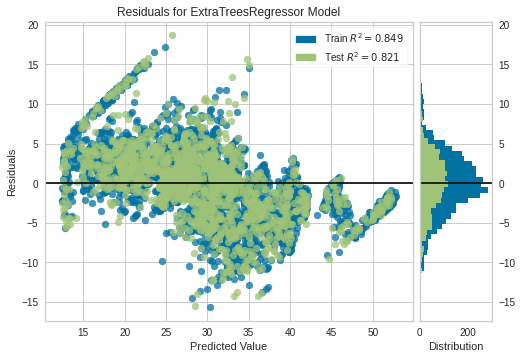

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [40]:
plot_model(tuned_et)

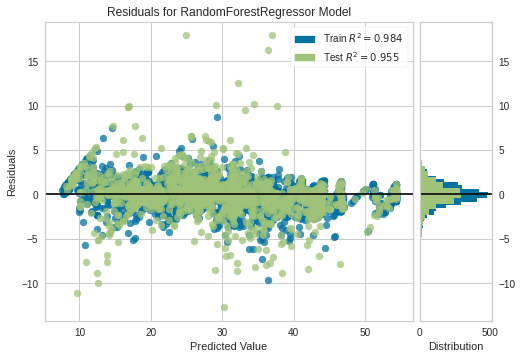

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [41]:
plot_model(tuned_rf)

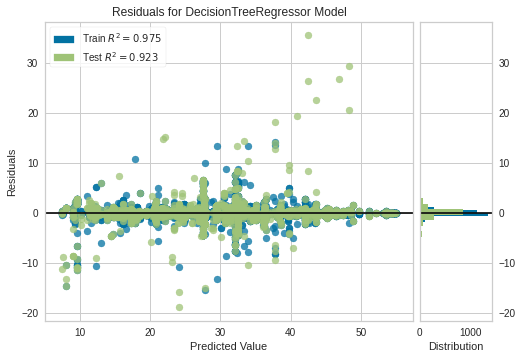

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [42]:
plot_model(tuned_dt)

# 10.2 Prediction Error Plot

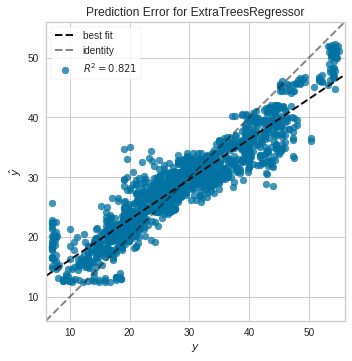

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [43]:
plot_model(tuned_et, plot = 'error')

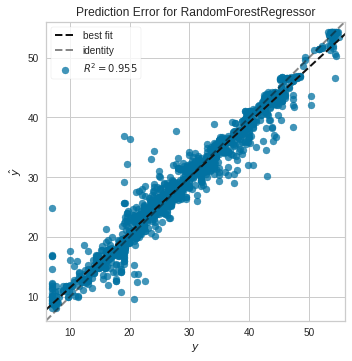

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [44]:
plot_model(tuned_rf, plot = 'error')

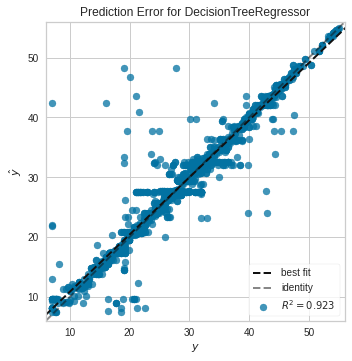

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [45]:
plot_model(tuned_dt, plot = 'error')

# 10.3 Feature Importance Plot

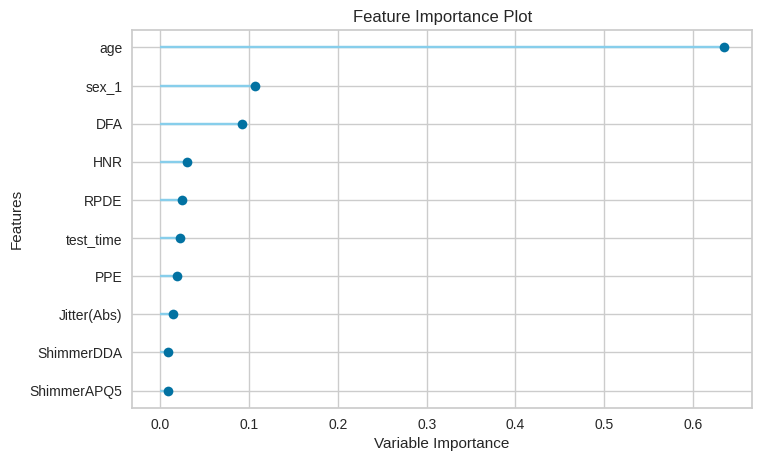

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_et, plot='feature')

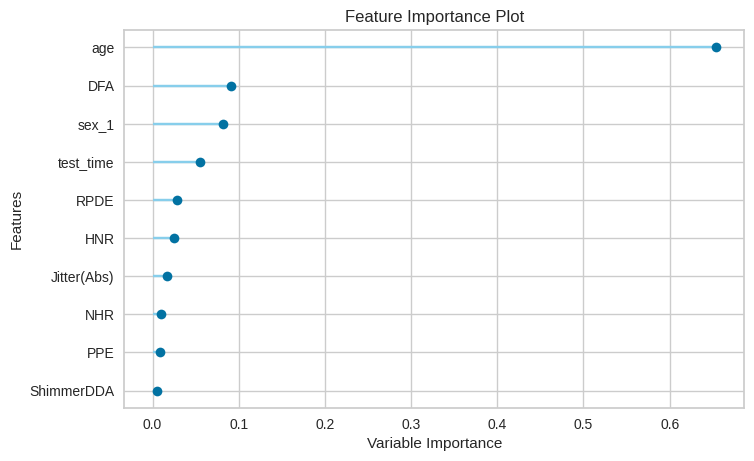

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [46]:
plot_model(tuned_rf, plot='feature')

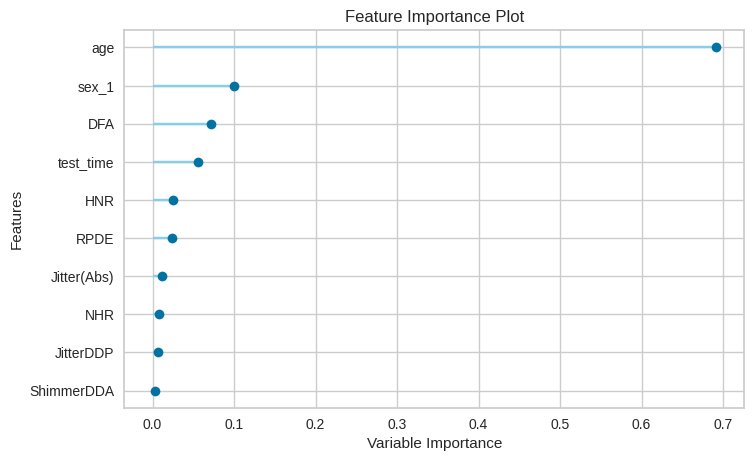

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [47]:
plot_model(tuned_dt, plot='feature')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function.

# 11.0 Predict on Test / Hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% of the data has been separated out as a test/hold-out sample. All of the evaluation metrics we have seen above are cross-validated results based on training set (70%) only. Now, using our final trained model stored in the `tuned_rf` variable we will predict the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [48]:
predict_model(tuned_rf);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=150,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Random Forest Regressor  1.4042  4.9531  2.2255  0.9553  0.1052  0.0647

The R2 on the test/hold-out set is **`0.9553`** compared to **`0.9670	`** achieved on `tuned_rf` CV results (in section 9.2 above). This is not a significant difference. If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and predicting on unseen data (the 10% that we had separated in the beginning and never exposed to PyCaret).

(TIP : It's always good to look at the standard deviation of CV results when using `create_model`.)

# 12.0 Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [49]:
final_rf = finalize_model(tuned_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=150,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=150,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
               

In [51]:
print(final_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=150,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


**Caution:** One final word of caution. Once the model is finalized using `finalize_model()`, the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after `finalize_model()` is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use `final_rf` under `predict_model()` to compare the information grid with the one above in section 11. 

In [50]:
predict_model(final_rf);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=150,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE     MSE    RMSE     R2   RMSLE    MAPE
0  Random Forest Regressor  1.0531  2.1092  1.4523  0.981  0.0714  0.0471

Notice how the R2 in the `final_rf` has increased to **`0.981`** from **`0.9553`**, even though the model is same. This is because the `final_rf` variable is trained on the complete dataset including the test/hold-out set.

# 13.0 Predict on Unseen Data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the `data_unseen` parameter. `data_unseen` is the variable created at the beginning of the tutorial and contains 10%  of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [52]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=150,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model     MAE     MSE    RMSE      R2   RMSLE   MAPE
0  Random Forest Regressor  1.3711  5.3537  2.3138  0.9546  0.1086  0.063

age  sex  test_time  total_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
0   72    0     40.652       36.870    0.00353     0.000023     0.00119   
1   72    0     54.640       37.857    0.00476     0.000025     0.00226   
2   72    0     82.653       39.834    0.00537     0.000032     0.00236   
3   72    0     96.633       41.034    0.00354     0.000024     0.00142   
4   72    0    131.640       44.146    0.00571     0.000037     0.00296   

   Jitter:PPQ5  Jitter:DDP  Shimmer  ...  Shimmer:APQ3  Shimmer:APQ5  \
0      0.00159     0.00357  0.02227  ...       0.01006       0.01337   
1      0.00259     0.00678  0.02191  ...       0.00979       0.01462   
2      0.00278     0.00709  0.02377  ...       0.01001       0.01375   
3      0.00150     0.00427  0.02107  ...       0.00847       0.01040   
4      0.00293     0.00889  0.02522  ...       0.01260       0.01466   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  \
0        0.02263      0.03019  0.009438  22.946  0.53949  0.57243  0.19500   
1        0.01911      0.02937  0.027969  22.929  0.47712  0.54234  0.23844   
2        0.02395      0.03003  0.017115  24.204  0.46686  0.57984  0.19390   
3        0.01920      0.02540  0.015008  24.614  0.61348  0.60661  0.15881   
4        0.02145      0.03780  0.031546  23.129  0.52714  0.59220  0.18211   

       Label  
0  32.246166  
1  36.865404  
2  34.604350  
3  40.010285  
4  33.075801  

[5 rows x 21 columns]

The `Label` column is added onto the `data_unseen` set. Label is the predicted value using the `final_rf` model. If you want predictions to be rounded, you can use `round` parameter inside `predict_model()`. You can also check the metrics on this since you have actual target column `total_UPDRS` available. To do that we will use pycaret.utils module. See example below:

In [53]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.total_UPDRS, unseen_predictions.Label, 'R2')

0.9546

# 14.0 Saving the Model

We have now finished the experiment by finalizing the `tuned_rf` model which is now stored in `final_rf` variable. We have also used the model stored in `final_rf` to predict `data_unseen`. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [54]:
save_model(final_rf,'Final RF Model 4Dec2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=150,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False), model_name=Final RF Model 4Dec2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='total_UPDRS', time_feat

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='total_UPDRS', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=60,
                                        max_features='auto', max_leaf_nodes=150,
                                        max_samples=None,
                                

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

# 15.0 Loading the Saved Model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [55]:
saved_final_rf = load_model('Final RF Model 4Dec2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final RF Model 4Dec2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we used in section 13 above.

In [56]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='total_UPDRS', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=60,
                                       max_features='auto', max_leaf_nodes=150,
                                

Model     MAE     MSE    RMSE      R2   RMSLE   MAPE
0  Random Forest Regressor  1.3711  5.3537  2.3138  0.9546  0.1086  0.063

In [57]:
new_prediction.head()

age  sex  test_time  total_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
0   72    0     40.652       36.870    0.00353     0.000023     0.00119   
1   72    0     54.640       37.857    0.00476     0.000025     0.00226   
2   72    0     82.653       39.834    0.00537     0.000032     0.00236   
3   72    0     96.633       41.034    0.00354     0.000024     0.00142   
4   72    0    131.640       44.146    0.00571     0.000037     0.00296   

   Jitter:PPQ5  Jitter:DDP  Shimmer  ...  Shimmer:APQ3  Shimmer:APQ5  \
0      0.00159     0.00357  0.02227  ...       0.01006       0.01337   
1      0.00259     0.00678  0.02191  ...       0.00979       0.01462   
2      0.00278     0.00709  0.02377  ...       0.01001       0.01375   
3      0.00150     0.00427  0.02107  ...       0.00847       0.01040   
4      0.00293     0.00889  0.02522  ...       0.01260       0.01466   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  \
0        0.02263      0.03019  0.009438  22.946  0.53949  0.57243  0.19500   
1        0.01911      0.02937  0.027969  22.929  0.47712  0.54234  0.23844   
2        0.02395      0.03003  0.017115  24.204  0.46686  0.57984  0.19390   
3        0.01920      0.02540  0.015008  24.614  0.61348  0.60661  0.15881   
4        0.02145      0.03780  0.031546  23.129  0.52714  0.59220  0.18211   

       Label  
0  32.246166  
1  36.865404  
2  34.604350  
3  40.010285  
4  33.075801  

[5 rows x 21 columns]

Notice that the results of `unseen_predictions` and `new_prediction` are identical.

In [58]:
from pycaret.utils import check_metric
check_metric(new_prediction.total_UPDRS, new_prediction.Label, 'R2')

0.9546

# 16.0 Wrap-up / Next Steps?

This tutorial has covered the entire machine learning pipeline from data ingestion, pre-processing, training the model, hyperparameter tuning, prediction and saving the model for later use. We have completed all of these steps in less than 10 commands which are naturally constructed and very intuitive to remember such as `create_model()`, `tune_model()`, `compare_models()`. Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code in most libraries.

We have only covered the basics of `pycaret.regression`. In following tutorials we will go deeper into advanced pre-processing, ensembling, generalized stacking and other techniques that allow you to fully customize your machine learning pipeline and are must know for any data scientist.

See you at the next tutorial. Follow the link to __[Regression Tutorial (REG102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)__